In [1]:
import numpy as np
import pandas as pd
import collections
import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import math
import matplotlib.pyplot as plt
from scipy.special import zeta
from wordcloud import WordCloud
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### Helpful functions

In [2]:
def seed_words(path:str):
    list_seed_words = []
    with open(file=path, mode="r", encoding="utf8") as f:
        for line in f:
            list_seed_words.append(re.sub("\n", "", line))

    return list_seed_words

def extract_year(date: str):
    return date[:4]

def list_to_dict_count(lst:list):
    out = nltk.defaultdict(int)
    for token in lst:
        out[token] += 1
    return sorted(out.items(), key=lambda x : x[1], reverse=True)

def top_n_not_stopwords(d: dict, n=10):
    out = nltk.defaultdict(list)
    stopwords_english = set(stopwords.words("english"))
    sorted_data = dict(sorted(d.items()))
    for k, v in sorted_data.items():
        for value in v:
            if value[0] not in stopwords_english:
                out[k].append(value)
    return out

In [3]:
#load datasets
df_igbt = pd.read_csv("assign1_data/lgbt_news_corpus.csv", encoding="ISO-8859-1")
df_bg = pd.read_csv("assign1_data/background_news_corpus.csv", encoding="ISO-8859-1")

C:\Users\azizc\AppData\Local\Temp\ipykernel_11048\4241532332.py:2: DtypeWarning: Columns (7,8,10,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_igbt = pd.read_csv("assign1_data/lgbt_news_corpus.csv", encoding="ISO-8859-1")


In [4]:
df_igbt.columns

Index(['Text', 'Title', 'Id', 'Count', 'Date', 'Category', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [5]:
df_bg.columns

Index(['Text', 'Title', 'Id', 'Count', 'Date', 'Category'], dtype='object')

In [6]:
#remove unnamed columns to be able to merge both datasets together later on
df_igbt = df_igbt[["Text", "Title", "Id", "Count", "Date", "Category"]]

In [7]:
df_igbt.columns

Index(['Text', 'Title', 'Id', 'Count', 'Date', 'Category'], dtype='object')

In [8]:
# merge both datasets
frames = [df_igbt, df_bg]
merged_dataset = pd.concat(frames)

In [9]:
merged_dataset.columns

Index(['Text', 'Title', 'Id', 'Count', 'Date', 'Category'], dtype='object')

In [11]:
len(merged_dataset) == len(df_igbt) + len(df_bg)

True

In [13]:
# preprocess the dataset
# Add YEAR column from DATE 
merged_dataset["Year"] = merged_dataset["Date"].apply(lambda d: extract_year(d))

#lowercase the text
merged_dataset["Text_Lower"] = merged_dataset["Text"].apply(lambda t: str(t).lower())

In [23]:
seed_words_list = seed_words("assign1_data\seed_list.txt")

In [24]:
def context(dataF, seed_list: list, window_size=3):
    text_data = dataF["Text_Lower"].values
    years = dataF["Year"].values
    word_per_years = nltk.defaultdict(list)
    occurence = nltk.defaultdict(int)
    seed_year_words_count_dict = nltk.defaultdict(dict)

    for seed_w in seed_list:
        for g_idx, sent in enumerate(text_data):
            #preprocessing
            sent_prep_0 = re.sub("\'\'", "", sent)
            sent_prep_1 = re.sub("``", "", sent_prep_0)
            sent_prep_2 = re.sub("\'s", "", sent_prep_1) 
            sent_prep_2 = re.sub(r"''", "", sent_prep_2)
            sent_prep_2 = re.sub(r"\'", "", sent_prep_2)
            sent_prep_3 = re.sub(r'[^\x00-\x7F]+', '', sent_prep_2) #remove all non-ASCII characters
            year = int(years[g_idx])

            tokens = word_tokenize(sent_prep_3)
            tokens_words = [w for w in tokens if w not in string.punctuation]
            
            for idx, t in enumerate(tokens_words):
                #surroundings = []
                if t == seed_w:
                    left_words = tokens_words[max(0, idx-3):idx]
                    right_words = tokens_words[idx+1:min(idx+4, len(tokens_words))]
                    context_words = left_words + right_words
                    for c_w in context_words:
                        #occurence[c_w] += 1
                        word_per_years[year].append(c_w)
                    
        seed_year_words_count_dict[seed_w] = word_per_years
    #return occurence, sorted(occurence.items(), key= lambda x : x[1], reverse=True), word_per_years
    return seed_year_words_count_dict


In [26]:
contex_dict = context(dataF=merged_dataset, seed_list=seed_words_list)

In [36]:
dict(list_to_dict_count(contex_dict["gay"][2014]))

{'and': 545,
 'marriage': 376,
 'the': 364,
 'to': 289,
 'of': 282,
 'a': 213,
 'gay': 191,
 'in': 189,
 'couples': 157,
 'on': 154,
 'for': 139,
 'rights': 132,
 'that': 127,
 'lesbian': 123,
 'bisexual': 121,
 'people': 101,
 'men': 89,
 'transgender': 88,
 'who': 79,
 'was': 71,
 'ban': 71,
 'are': 70,
 'is': 70,
 'he': 68,
 'or': 67,
 'as': 61,
 'openly': 52,
 'by': 50,
 'said': 49,
 'marriages': 49,
 'but': 47,
 'against': 47,
 'were': 44,
 'not': 40,
 'lesbians': 40,
 'states': 38,
 'first': 37,
 'from': 37,
 'be': 35,
 'have': 34,
 'with': 34,
 'has': 34,
 'about': 34,
 'at': 32,
 'i': 30,
 'being': 28,
 'state': 28,
 'it': 27,
 'married': 27,
 'they': 26,
 'an': 26,
 'its': 25,
 'support': 25,
 'community': 24,
 'his': 24,
 'their': 24,
 'one': 23,
 'had': 23,
 'couple': 22,
 'constitutional': 22,
 'many': 21,
 'abortion': 21,
 'gays': 21,
 'out': 20,
 'bans': 20,
 'she': 19,
 'also': 19,
 'other': 19,
 'like': 19,
 'some': 18,
 'player': 18,
 'which': 18,
 'legal': 18,
 'where

In [55]:
list_to_dict_count(contex_dict["gay"][2014])

[('and', 545),
 ('marriage', 376),
 ('the', 364),
 ('to', 289),
 ('of', 282),
 ('a', 213),
 ('gay', 191),
 ('in', 189),
 ('couples', 157),
 ('on', 154),
 ('for', 139),
 ('rights', 132),
 ('that', 127),
 ('lesbian', 123),
 ('bisexual', 121),
 ('people', 101),
 ('men', 89),
 ('transgender', 88),
 ('who', 79),
 ('was', 71),
 ('ban', 71),
 ('are', 70),
 ('is', 70),
 ('he', 68),
 ('or', 67),
 ('as', 61),
 ('openly', 52),
 ('by', 50),
 ('said', 49),
 ('marriages', 49),
 ('but', 47),
 ('against', 47),
 ('were', 44),
 ('not', 40),
 ('lesbians', 40),
 ('states', 38),
 ('first', 37),
 ('from', 37),
 ('be', 35),
 ('have', 34),
 ('with', 34),
 ('has', 34),
 ('about', 34),
 ('at', 32),
 ('i', 30),
 ('being', 28),
 ('state', 28),
 ('it', 27),
 ('married', 27),
 ('they', 26),
 ('an', 26),
 ('its', 25),
 ('support', 25),
 ('community', 24),
 ('his', 24),
 ('their', 24),
 ('one', 23),
 ('had', 23),
 ('couple', 22),
 ('constitutional', 22),
 ('many', 21),
 ('abortion', 21),
 ('gays', 21),
 ('out', 20),


In [89]:
def sort_context_dict(context_dict: dict, remove_stop=False) -> dict:
    out = {}
    tmp = {}
    for k,v in context_dict.items():
        for y, l in sorted(v.items()):
            tmp[y] = dict(list_to_dict_count(l))
            if remove_stop:
                no_stops = [item for item in l if item[0] not in set(stopwords.words("english"))]
                tmp[y] =  dict(list_to_dict_count(no_stops))
        out[k] = tmp
    return out

In [69]:
cc = {}
cc_tmp = {}
for k,v in contex_dict.items():
    for y, l in sorted(v.items()):
        cc_tmp[y] = dict(list_to_dict_count(l))
    cc[k] = cc_tmp


In [64]:
cc = dict(sorted(cc.items()))

In [70]:
cc["gay"].keys()

dict_keys([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [56]:
contex_dict["gay"]

defaultdict(list,
            {2015: ['who',
              'identifies',
              'as',
              'or',
              'neither',
              'male',
              'as',
              'gay',
              'lesbian',
              'or',
              'transgender',
              'said',
              'against',
              'lesbian',
              'gay',
              'and',
              'transgender',
              'people',
              'lesbian',
              'transgender',
              'and',
              'marchers',
              'along',
              'with',
              'of',
              'lesbian',
              'gay',
              'and',
              'transgender',
              'pride',
              'for',
              'lesbians',
              'gays',
              'and',
              'transgender',
              'people',
              'part',
              'lesbian',
              'gay',
              'the',
              't',
              'for',
 

In [72]:
sorted_context_dict = sort_context_dict(context_dict=contex_dict)

In [87]:
def plot_word_clouds(top_words:dict, df_name:str, seed_word:str, year:int) -> None:
    #top_words_sorted_year = sorted(top_words.items(), key=lambda x: x[0])
    #lst_years = list(dict(top_words_sorted_year).keys())

    
    #dict_of_year = dict(dict(top_words_sorted_year)[y])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words[seed_word][year])
    # Plot the word cloud
    fig = plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Context of [{seed_word}] in year {year}")
    plt.axis('off')
    plt.tight_layout(pad=0)
    full_name = df_name + "_wc_" + str(y) 
    fig.savefig("seed_word_plots/" + full_name + ".png")
    plt.show()

In [84]:
sorted_context_dict["gay"]

{1986: {'and': 484,
  'the': 420,
  'of': 309,
  'a': 223,
  'men': 214,
  'to': 213,
  'rights': 163,
  'in': 157,
  'for': 122,
  'or': 111,
  'that': 105,
  'against': 82,
  'said': 80,
  'as': 76,
  'are': 73,
  'have': 71,
  'gay': 70,
  'with': 66,
  'who': 64,
  'lesbian': 60,
  'is': 57,
  'groups': 56,
  'by': 56,
  'intravenous': 55,
  'among': 55,
  'not': 50,
  'on': 48,
  'drug': 47,
  'discrimination': 44,
  'was': 41,
  'homosexual': 40,
  'community': 38,
  'they': 38,
  'acts': 38,
  'be': 37,
  'national': 37,
  'he': 37,
  'it': 33,
  'bisexual': 33,
  'has': 32,
  'bill': 31,
  'male': 31,
  'been': 29,
  'but': 29,
  'health': 29,
  'city': 28,
  'were': 28,
  'activity': 27,
  'aids': 27,
  'task': 26,
  'people': 25,
  'had': 24,
  'new': 24,
  'lesbians': 24,
  'between': 24,
  'mr.': 23,
  'which': 23,
  'at': 23,
  'because': 23,
  'crisis': 22,
  'an': 21,
  'his': 21,
  'heterosexual': 20,
  'about': 20,
  'this': 19,
  'group': 19,
  'advocates': 19,
  'fro

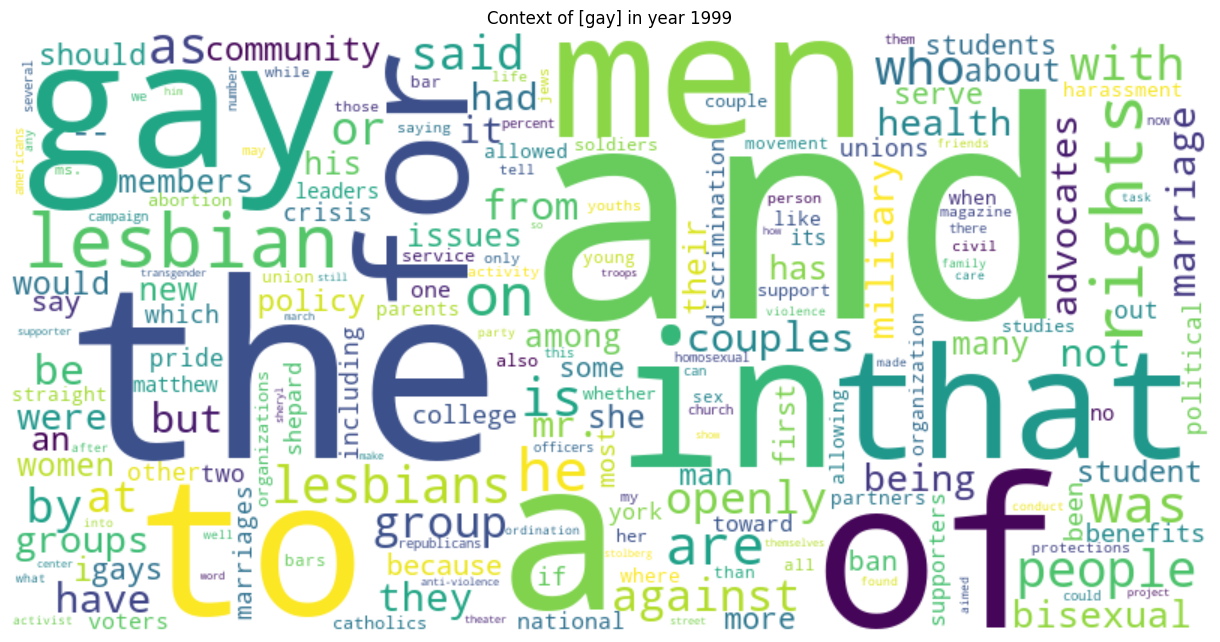

In [88]:
plot_word_clouds(sorted_context_dict, "merged", "gay", 1999)